In [1]:
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from stopwords import gr_stopwords

pd.set_option('display.max_colwidth', 50)

C:\Users\jtoli\miniconda3\envs\greeknlp\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [98]:
df = pd.read_csv('data/greek_news_climate.tar.bz2')
df['published_date'] = pd.to_datetime(df['published_date'])

In [99]:
# Data cleaning 
# Removing duplicates, irrelevant articles
# and rows without summaries

df.drop_duplicates(subset = ['summary'], inplace = True)
df = df.query(" _score > 15 ")

mask = df['summary'].notna()
df = df[mask]

df.shape

(28879, 19)

In [101]:
news_list = df['summary'].to_list()
timestamps = df['published_date'].to_list()

In [120]:
vectorizer_model = CountVectorizer(stop_words = gr_stopwords)

topic_model = BERTopic(language = 'multilingual', nr_topics = 50,
                       vectorizer_model = vectorizer_model, verbose = True)
                     

In [121]:
topics, probs = topic_model.fit_transform(news_list)

Batches: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 903/903 [02:19<00:00,  6.47it/s]
2022-10-24 21:48:01,315 - BERTopic - Transformed documents to Embeddings
2022-10-24 21:48:10,936 - BERTopic - Reduced dimensionality
2022-10-24 21:48:13,365 - BERTopic - Clustered reduced embeddings
2022-10-24 21:48:57,697 - BERTopic - Reduced number of topics from 806 to 51


In [122]:
topic_model.get_topic_info()[:20]

,Topic,Count,Name
0,-1,16884,-1_κλιματική_αλλαγή_ελλάδα_κρίση
1,0,1330,0_άνθρακα_πλανήτη_κλιματική_εκπομπές
2,1,464,1_τροφίμων_επισιτιστική_ουκρανία_εκατομμύρια
3,2,404,2_2022_11_συριζα_10
4,3,395,3_πλημμύρες_πακιστάν_άνθρωποι_σίδνεϊ
5,4,354,4_αερίου_φυσικού_υδρογόνο_αέριο
6,5,339,5_αγρότες_αγροτικής_τομέα_ανάπτυξης
7,6,336,6_παπαστράτος_nova_wind_προστασίας
8,7,332,7_νατο_ουκρανία_ρωσία_πούτιν
9,8,318,8_g20_λάιεν_φον_ντερ


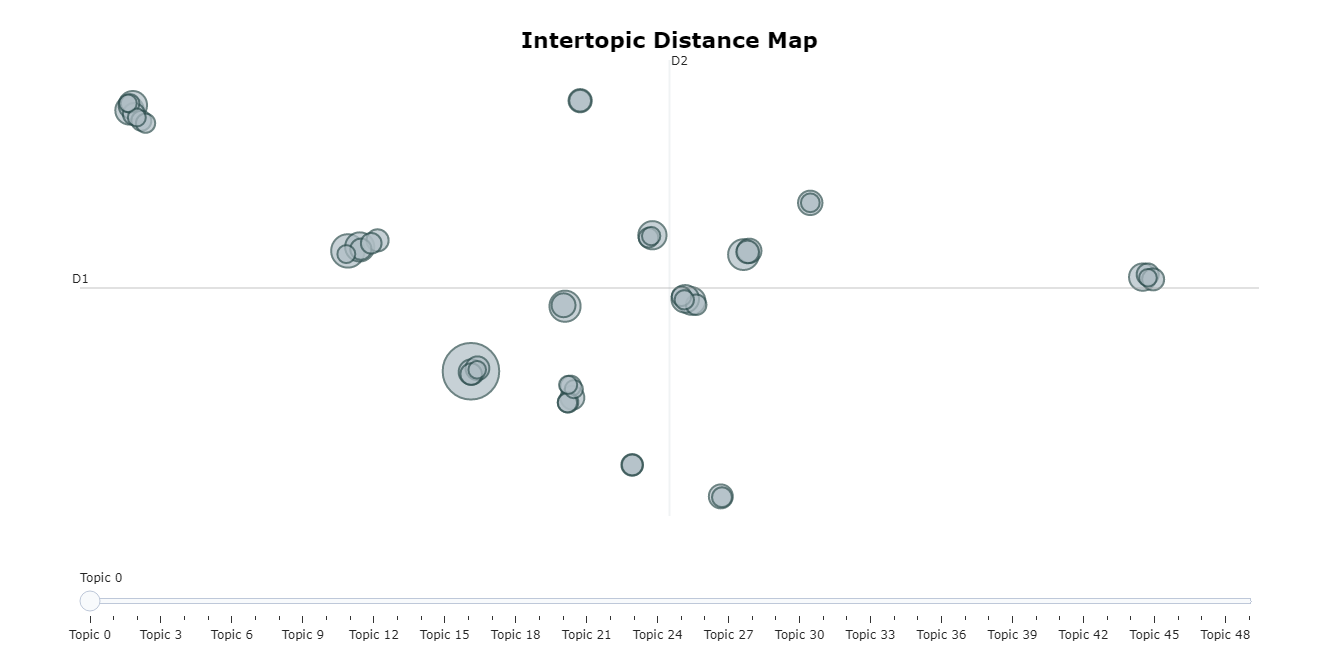

In [123]:
topic_model.visualize_topics()

In [ ]:
topics_over_time = topic_model.topics_over_time(news_list, timestamps)

topic_model.visualize_topics_over_time(topics_over_time)

1624it [05:04,  5.55it/s]